# Sanity checks
* Verify that non-precessing case returns trivial angles
* Verify that rotation into and out of coprecessing frame is correct 
* Verify that correct optimal emission direction is found

In [2]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# Setup the notebook's environment
import numpy as np
from numpy import *
from matplotlib.pyplot import *
from positive import *
from nrutils import lalphenom
from positive.units import *
from nrutils import scsearch,gwylm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(positive)>> Applying custom matplotlib settings.


In [3]:
# Find a catalog entry of interest using a keyword search
a = scsearch(keyword='q8a08t120',verbose=True)[0]

(scsearch)>> Found keyword (=q8a08t120) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 3 possibly degenerate simulations:
(scsearch)>> [0001][pnr-catalog] q8: 1chi0.80-p-q8.00	(q8a08t120dP2_r03_T_96_360)
(scsearch)>> [0002][hogshead] q8precessing: 1chi0.80-p-q8.00	(q8a08t120dP2_r03_T_96_360)
(scsearch)>> [0003][hogshead] q8precessing: 1chi0.80-p-q8.00	(q8a08t120dP2_r03_T_96_360_OLD)



In [4]:
# Load the realted NR waveform
y = {}
lmax = 4
y['raw'] = gwylm(a,lmax=lmax,dt=0.5,clean=True,verbose=False,pad=2000,load_dynamics=True)

(romline!)>> N is 2, but it must be less than or equal to 3. We have set N=3. This course is often desired in cases where N=2 is naively given.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.


## Verify that non-precessing case returns trivial angles

In [5]:
# Find a catalog entry of interest using a keyword search
a = scsearch(keyword='HRq',q=4,verbose=True)[0]

(scsearch)>> Found keyword (=HRq) keyword.
(scsearch)>> Found q (=4) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch)>> ## Found 1 possibly degenerate simulations:
(scsearch)>> [0001][bradwr] HRq-series: ns-q4.00	(D9_q4.0_a0.0_m160)



In [7]:
# Load the realted NR waveform
y = {}
lmax = 4
y['np'] = gwylm(a,lmax=lmax,dt=0.5,clean=True,verbose=False,pad=2000,load_dynamics=not True)

(romline!)>> N is 2, but it must be less than or equal to 3. We have set N=3. This course is often desired in cases where N=2 is naively given.


In [8]:
# Calc coprecessing frame
y['np-cp'] = y['np'].__calc_coprecessing_frame__(transform_domain='td',kind='psi4')

(__calc_coprecessing_frame__!)>> calculating the co-precessing frame in a non-initial J frame is prone to errors. please consider placing your gwylm object in a frame where J is initially along z-hat via gwylmo.__calc_initial_j_frame__()
(__init__!)>> This function works best if the gwylm object input is in a J-aligned frame, but raw-simulation frame found
(calc_coprecessing_angles)>> The domain values seem unevenly split between positive and negative values. Thus, we will interpret the input as corresponding to TIME DOMAIN data.
(calc_coprecessing_angles!)>> flipping manually for negative domain
(__rotate_frame_at_all_times__)>> Note that metadata at the scentry level (i.e. this.__scentry__) have not been rotated, but this.Sf, this.R1 and others have been rotated. This includes radiated and remnant quantities.


In [9]:
# Extract frame info
foo = y['np-cp'].previous_radiation_axis_info

(<Figure size 1152x1152 with 3 Axes>,
 (<matplotlib.axes._subplots.AxesSubplot at 0xb1c481d68>,
  <matplotlib.axes._subplots.AxesSubplot at 0x108183da0>))

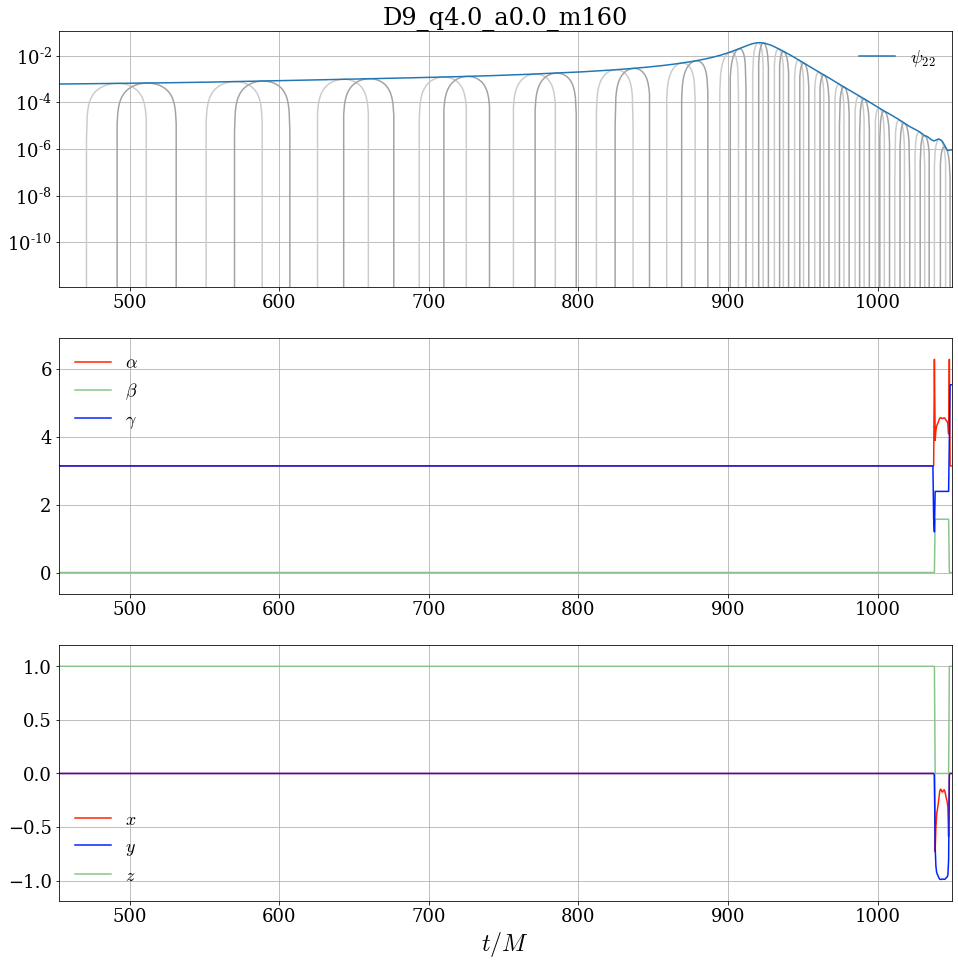

In [12]:
foo.plot_radiation_axis_3panel()

In [ ]:
0